
Step 1: Load and Inspect the Dataset

In [2]:
#import libray
import pandas as pd

#read the data
data = pd.read_csv("lettuce_dataset.csv", )


In [3]:
# Step 1: Inspect the dataset
print("First few rows of the dataset:")
print(data.head())

print("\nDataset info:")
print(data.info())

First few rows of the dataset:
   Plant_ID      Date  Temperature (�C)  Humidity (%)  TDS Value (ppm)  \
0         1  8/3/2023              33.4            53              582   
1         1  8/4/2023              33.5            53              451   
2         1  8/5/2023              33.4            59              678   
3         1  8/6/2023              33.4            68              420   
4         1  8/7/2023              33.4            74              637   

   pH Level  Growth Days  
0       6.4            1  
1       6.1            2  
2       6.4            3  
3       6.4            4  
4       6.5            5  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Date              3169 non-null   object 
 2   Temperature (�C)  3169 non-null   float64
 3   H

In [4]:
# Step 2: Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())



Missing values per column:
Plant_ID            0
Date                0
Temperature (�C)    0
Humidity (%)        0
TDS Value (ppm)     0
pH Level            0
Growth Days         0
dtype: int64


In [5]:
# Step 3: Convert Data Types
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # errors='coerce' will handle invalid dates

# Check if any dates are still missing after conversion
if data['Date'].isnull().sum() > 0:
    print("There were invalid dates that could not be converted.")

# Ensure numeric columns are in the correct format
numeric_columns = ['Temperature (�C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # errors='coerce' will handle non-numeric values


In [6]:
# Step 4: Feature Engineering
# Extract day, month, and year from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Create a growth phase based on Growth Days
# Early (0-30), Middle (31-60), Full Maturity (61+)
# Check the maximum of 'Growth Days' to ensure it is greater than 60
max_growth_days = data['Growth Days'].max()

# Define bins based on the max value of Growth Days to avoid errors
if max_growth_days > 60:
    bins = [0, 30, 60, max_growth_days]
    labels = ['Early', 'Middle', 'Full Maturity']
elif max_growth_days > 30:
    bins = [0, 30, max_growth_days]
    labels = ['Early', 'Middle']
else:
    bins = [0, max_growth_days]
    labels = ['Early']

# Create 'Growth Phase' feature with appropriate bins
data['Growth Phase'] = pd.cut(data['Growth Days'], bins=bins, labels=labels, right=False)

print("\nDataset with Growth Phase added:")
print(data[['Plant_ID', 'Growth Days', 'Growth Phase']].head())
print("\nTransformed dataset preview:")
print(data.head())


Dataset with Growth Phase added:
   Plant_ID  Growth Days Growth Phase
0         1            1        Early
1         1            2        Early
2         1            3        Early
3         1            4        Early
4         1            5        Early

Transformed dataset preview:
   Plant_ID       Date  Temperature (�C)  Humidity (%)  TDS Value (ppm)  \
0         1 2023-08-03              33.4            53              582   
1         1 2023-08-04              33.5            53              451   
2         1 2023-08-05              33.4            59              678   
3         1 2023-08-06              33.4            68              420   
4         1 2023-08-07              33.4            74              637   

   pH Level  Growth Days  Year  Month  Day Growth Phase  
0       6.4            1  2023      8    3        Early  
1       6.1            2  2023      8    4        Early  
2       6.4            3  2023      8    5        Early  
3       6.4            4 

Step 2: Exploratory Data Analysis [EDA]

In [7]:
# Display summary statistics for numeric columns
print("Summary statistics:")
print(data.describe())

# Check for unique values in categorical columns (if any)
print("\nUnique values in categorical columns:")
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {publish_display_data[col].nunique()} unique values")

Summary statistics:
          Plant_ID  Temperature (�C)  Humidity (%)  TDS Value (ppm)  \
count  3169.000000       3169.000000   3169.000000      3169.000000   
mean     35.441780         28.142222     64.873462       598.045440   
std      20.243433          4.670521      8.988985       115.713047   
min       1.000000         18.000000     50.000000       400.000000   
25%      18.000000         23.600000     57.000000       498.000000   
50%      35.000000         30.200000     65.000000       593.000000   
75%      53.000000         31.500000     73.000000       699.000000   
max      70.000000         33.500000     80.000000       800.000000   

          pH Level  Growth Days    Year        Month          Day  
count  3169.000000  3169.000000  3169.0  3169.000000  3169.000000  
mean      6.399211    23.140107  2023.0     8.359419    13.999053  
std       0.234418    13.075415     0.0     0.479906     8.300979  
min       6.000000     1.000000  2023.0     8.000000     1.000000  


c:\Users\Muneeb\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
c:\Users\Muneeb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Muneeb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


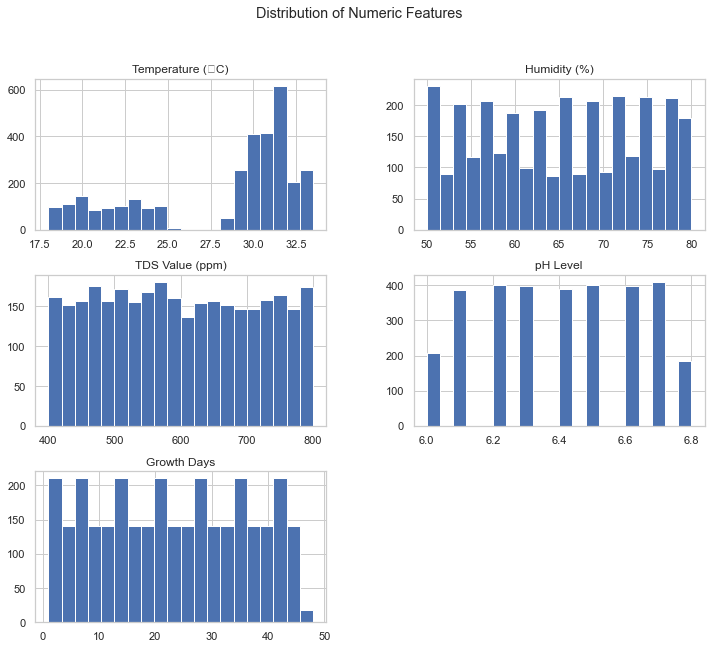

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Histogram for each numeric feature
numeric_features = ['Temperature (�C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Growth Days']
data[numeric_features].hist(bins=20, figsize=(12, 10), layout=(3, 2))
plt.suptitle("Distribution of Numeric Features")
plt.show()

c:\Users\Muneeb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Muneeb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


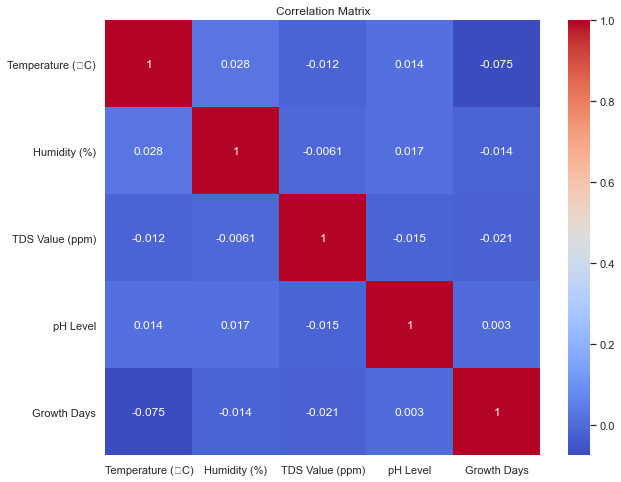

In [9]:
# Correlation matrix
correlation_matrix = data[numeric_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

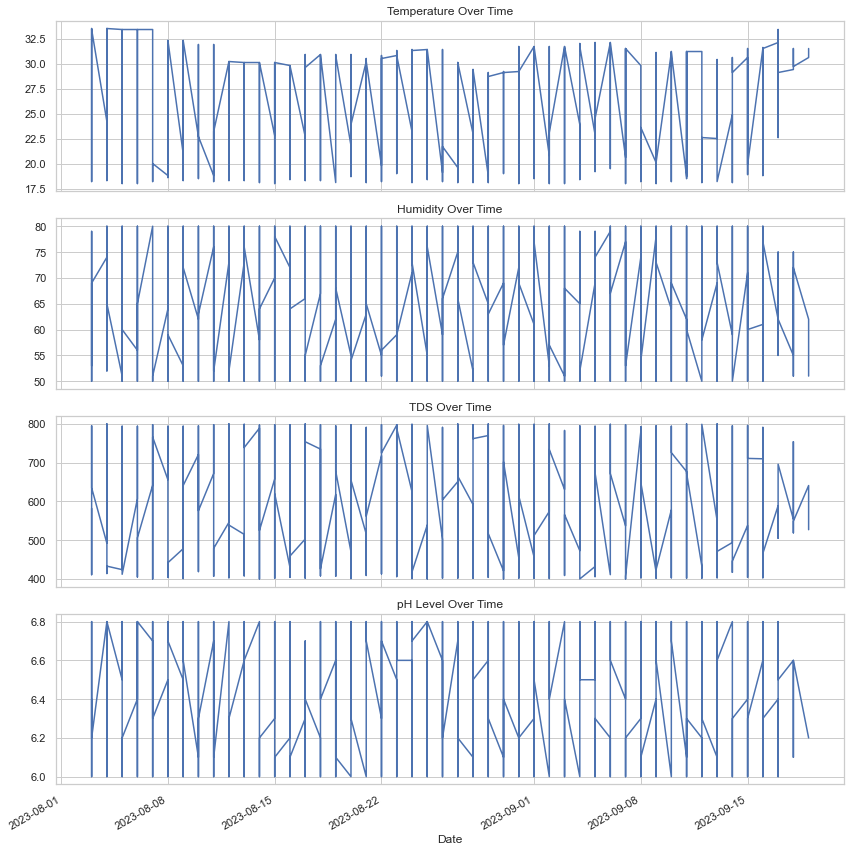

In [20]:
# Convert 'Date' to datetime if not already done
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as index for time series plots
data.set_index('Date', inplace=True)
# Plotting each environmental factor over time
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
data['Temperature (�C)'].plot(ax=axes[0], title='Temperature Over Time')
data['Humidity (%)'].plot(ax=axes[1], title='Humidity Over Time')
data['TDS Value (ppm)'].plot(ax=axes[2], title='TDS Over Time')
data['pH Level'].plot(ax=axes[3], title='pH Level Over Time')

plt.tight_layout()
plt.show()

# Reset index after plotting
data.reset_index(inplace=True)

c:\Users\Muneeb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Muneeb\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


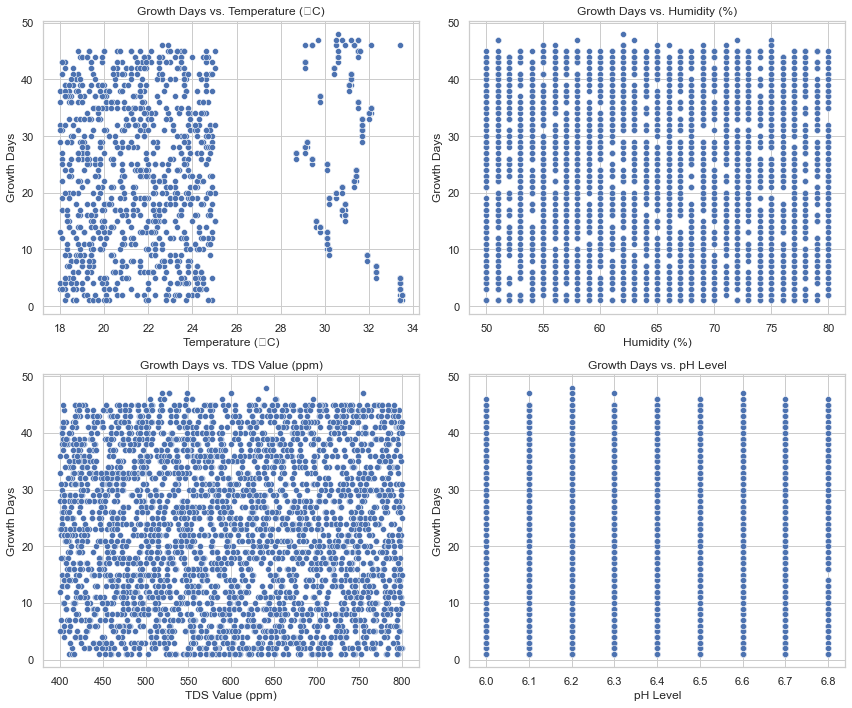

In [21]:
# Scatter plots to show Growth Days vs. each environmental factor
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features[:-1]):  # Skip Growth Days itself
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=data, x=feature, y='Growth Days')
    plt.title(f"Growth Days vs. {feature}")
plt.tight_layout()
plt.show()

In [ ]:
# Box plots to show environmental factors across different growth phases
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numeric_features[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=data, x='Growth Phase', y=feature)
    plt.title(f"{feature} by Growth Phase")
plt.tight_layout()
plt.show()